In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [79]:
# Read data from csv to data frame
df = pd.read_csv("sample_data/BankChurners.csv")

# drop columns:
#   CLIENTNUM
#   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
#   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
df.drop(["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)

# take a look at some initial rows in the dataset
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [80]:
print("Number of rows in dataset: " + str(df.shape[0]))
print("Number of columns in dataset: " + str(df.shape[1]))
print("\nColumns in Dataset are:")
for col in df.columns.tolist():
  print(col)

# statistical characteristics of numerical columns in the datastet.
df.describe()

Number of rows in dataset: 10127
Number of columns in dataset: 20

Columns in Dataset are:
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


***Questions to be considered:***
1. How many customers are highly educated/married
2. Do highly educated people have high income?
3. Income to spending trend
4. Predict who will be closing their account
5. People of what age use credit card more? 

Percentage of columns unknown: 0.14999506270366347


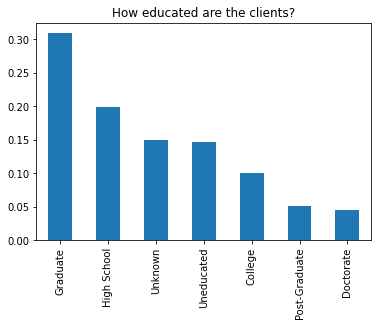

In [81]:
# Q1: How many customers are highly educated? 
# Is there a trend, based on education, in the number of people opting for credit card.

# find the count of customers in each category of studies
educational_stat = df["Education_Level"].value_counts()

# plot a bar chart showing the percentage of customers with each level of education
(educational_stat/df.shape[0]).plot(kind="bar");
plt.title("How educated are the clients?");

# We observe that post-graduate and doctorate clients form approxilmately 10% of the total.
# Graduate and High School clients form the half (50%) of the customers.

# We also don't know the education level detail of 15% of the people
print("Percentage of columns unknown: " + str(educational_stat['Unknown']/df.shape[0]))

Percentage of columns unknown: 0.07396069912116125


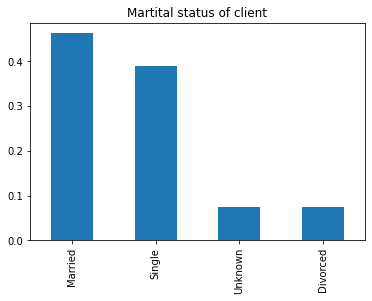

In [82]:
marital_stat = df["Marital_Status"].value_counts()

(marital_stat/df.shape[0]).plot(kind="bar");
plt.title("Martital status of client");

print("Percentage of columns unknown: " + str(marital_stat['Unknown']/df.shape[0]))

Total number of Graduate customers: 3128


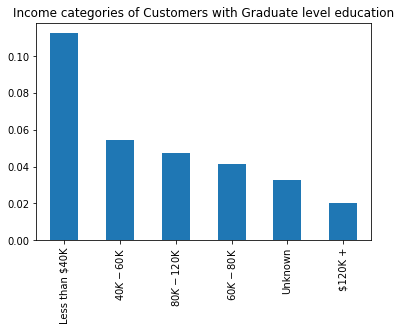

Total number of Post-Graduate customers: 516


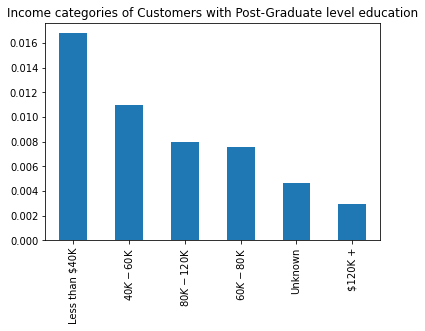

Total number of Doctorate customers: 451


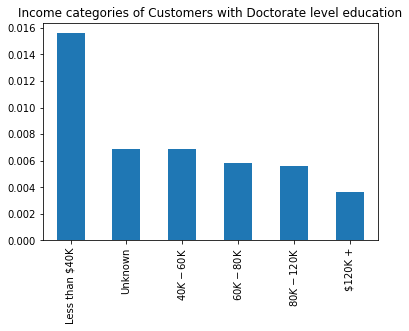

In [83]:
# Q2: Do highly educated people have high income?

# Let's take customers who are Graduates, Doctorates, Post-Graduate and plot against their salaries
def plot_income_categories(education_level):
  edu_cust = df[df["Education_Level"] == education_level]
  print("Total number of {} customers:".format(education_level), edu_cust.shape[0])
  (edu_cust["Income_Category"].value_counts()/df.shape[0]).plot(kind="bar");
  plt.title("Income categories of Customers with {} level education".format(education_level));
  plt.show()

edu_categories = ["Graduate", "Post-Graduate", "Doctorate"]

for cat in edu_categories:
  plot_income_categories(cat)

# We can observe a slight increase in the percentage of customers' salary with higher education level but the distribution across the salary categories appears to remain same.

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


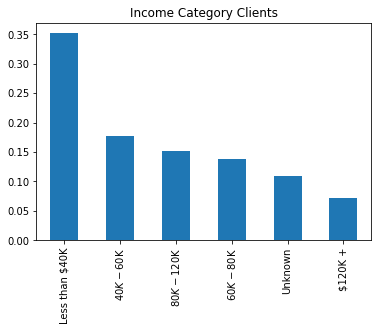

Percentage of columns unknown: 0.10980547052434086


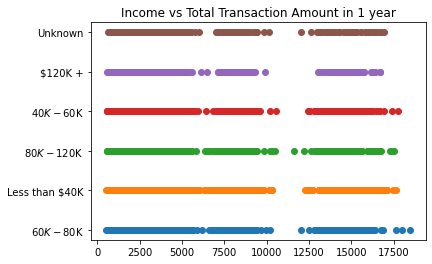

In [84]:
income_cat = df["Income_Category"].value_counts()

print(df["Income_Category"].unique())
(income_cat/df.shape[0]).plot(kind="bar");
plt.title("Income Category Clients");
plt.show()

print("Percentage of columns unknown: " + str(income_cat['Unknown']/df.shape[0]))

# Q3: Income to spending trend
incomeCategories =  df["Income_Category"].unique().tolist()
for cat in incomeCategories:
  plt.scatter(df[df["Income_Category"] == cat]["Total_Trans_Amt"], df[df["Income_Category"] == cat]["Income_Category"]);
plt.title("Income vs Total Transaction Amount in 1 year");

# We can observe no specific trend from the income of an individual to the transaction amount they spent

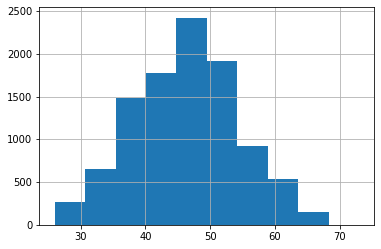

In [85]:
# Q5: People of what age use credit card more

df["Customer_Age"].hist();
# We can observe from histogram that the highest users of a credit card are middle age people of 40 - 55 years

In [86]:
# Replacing Attrition_Flag column to numerical category 1 - Existing Customer , 0 - Attrited Customer
replace_dict = {"Attrition_Flag" : { "Attrited Customer" : 0, "Existing Customer" : 1} }
df = df.replace(replace_dict)

df["Attrition_Flag"].head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

In [87]:
attrited_customers = df[df["Attrition_Flag"] == 0]
existing_customers = df[df["Attrition_Flag"] == 1]
print("No. of Attrited Customers: ", str(attrited_customers.shape[0]), "("+str(attrited_customers.shape[0]/df.shape[0])+"%)")
print("No. of Existing Customers: ", str(existing_customers.shape[0]), "("+str(existing_customers.shape[0]/df.shape[0])+"%)")

No. of Attrited Customers:  1627 (0.1606596227905599%)
No. of Existing Customers:  8500 (0.8393403772094401%)


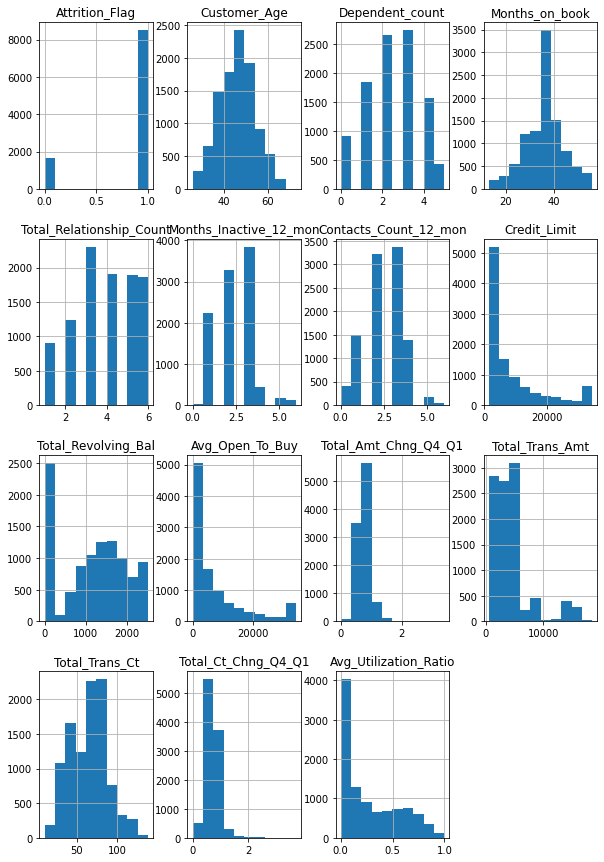

In [40]:
df.hist(figsize=(10,15));

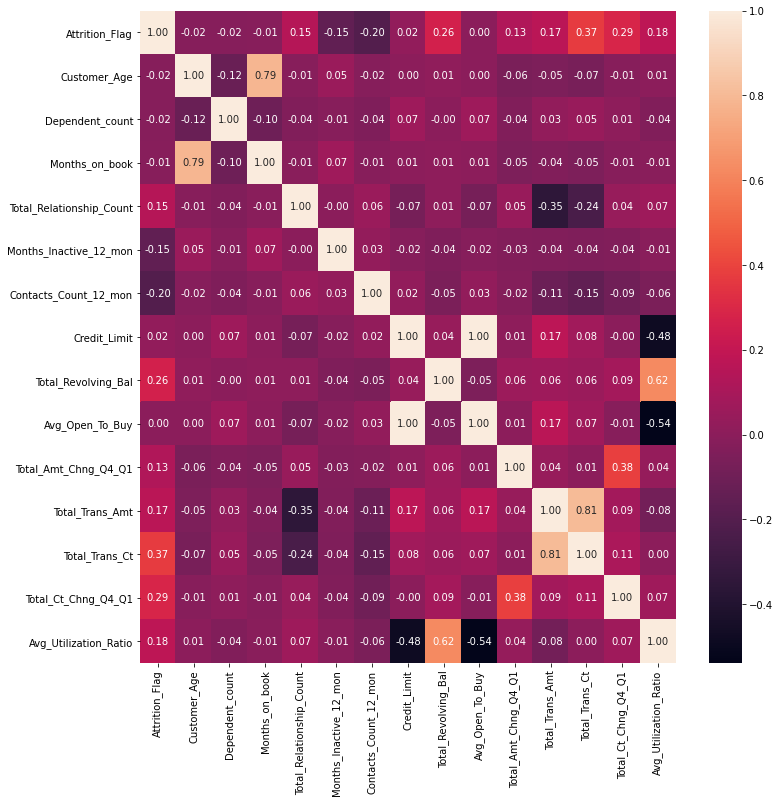

In [69]:
f, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f");

# Negative correlations:
# 1. Total_Relationship_Count to Total_Transaction_Amt - more the products held by customer the less they have spent?
# 2. Credit Limit to Avg. Card Utilization - People with more credit limit use less? or their usage is normal and they don't use up their entire limit

# Positive Correlations:
# 1. Average Open to Buy to Credit Limit - This is in congruence with negative correlation 2 
# 2. Total Revolving Balance to Avg Card Utilization


# Attrition Flag dependencies: Total Revolving Balance, Total Transaction Count, Total count change Q4 to Q1, Number of contacts, Months inactive

In [70]:
print(df.dtypes)

# What are the categorical columns in the dataset
print("\n\nCategorical Columns in dataset")
print(df.select_dtypes(include=['object']).columns)

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


Categorical Columns in dataset
Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [88]:
#check if there is any missing data
print("Columns with missing data: " + df.columns[df.isna().any()])

Index([], dtype='object')


In [89]:
# What the unknown values in each column?

# replace unknown by np.nan
cat_cols = df.select_dtypes(include='object')
cat_cols = cat_cols.replace('Unknown', np.nan)

# Find unknown rows percentage in each categorical column
print(cat_cols.isna().mean())

Gender             0.000000
Education_Level    0.149995
Marital_Status     0.073961
Income_Category    0.109805
Card_Category      0.000000
dtype: float64


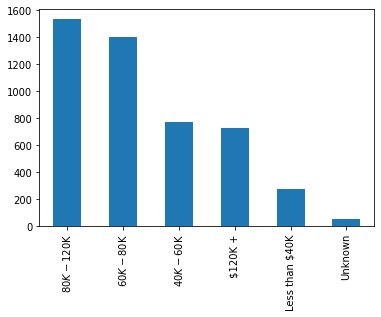

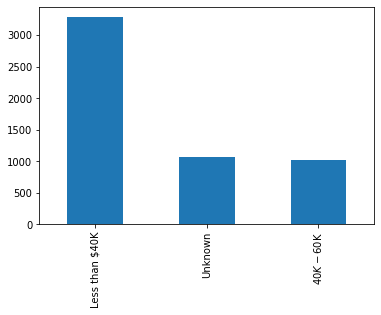

In [90]:
# How to fill these unknown values?

# We known income category is -0.54 correlated to Gender, negative is because we use numerical 0/1 for categories

# find mode of income category for each Gender
df[df['Gender'] == "M"]["Income_Category"].value_counts().plot(kind="bar");
plt.show()
df[df['Gender'] == "F"]["Income_Category"].value_counts().plot(kind="bar");
plt.show()

# Observation: women don't earn more than $60K in this dataset

mode_sal_male = df[df['Gender'] == "M"]["Income_Category"].value_counts().idxmax()
mode_sal_female = df[df['Gender'] == "F"]["Income_Category"].value_counts().idxmax()

df.loc[(df['Gender'] == "M") & (df["Income_Category"] == "Unknown"), "Income_Category"] = mode_sal_male
df.loc[(df['Gender'] == "F") & (df["Income_Category"] == "Unknown"), "Income_Category"] = mode_sal_female

# marital status and education level doesn't have strong correlation with any other columns
# Since we have less data in this dataset we will not drop these rows and keep as is.

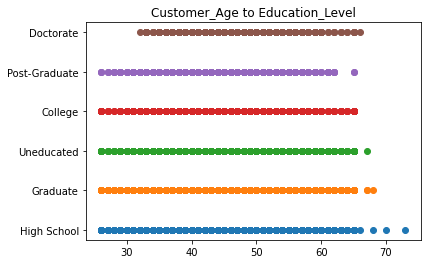

In [91]:
# Customer_Age to Education_level
edu_categories =  df["Education_Level"].unique().tolist()
edu_categories.remove("Unknown")
for cat in edu_categories:
  plt.scatter(df[df["Education_Level"] == cat]["Customer_Age"], df[df["Education_Level"] == cat]["Education_Level"]);
plt.title("Customer_Age to Education_Level");

age_to_edu = {
    '20-30': df[(df['Customer_Age'] > 20) & (df['Customer_Age'] <= 30)]["Education_Level"].value_counts().idxmax(),
    '30-40': df[(df['Customer_Age'] > 30) & (df['Customer_Age'] <= 40)]["Education_Level"].value_counts().idxmax(),
    '40-50': df[(df['Customer_Age'] > 40) & (df['Customer_Age'] <= 50)]["Education_Level"].value_counts().idxmax(),
    '50-60': df[(df['Customer_Age'] > 50) & (df['Customer_Age'] <= 60)]["Education_Level"].value_counts().idxmax(),
    '60-70': df[(df['Customer_Age'] > 60) & (df['Customer_Age'] <= 70)]["Education_Level"].value_counts().idxmax(),
}

# let's place mode of the range to Customer's Age bin
def getEducationLevel(data):
  if data["Customer_Age"] > 20 and data['Customer_Age'] <= 30:
    return age_to_edu['20-30']
  elif data["Customer_Age"] > 30 and data['Customer_Age'] <= 40:
    return age_to_edu['30-40']
  elif data["Customer_Age"] > 40 and data['Customer_Age'] <= 50:
    return age_to_edu['40-50']
  elif data["Customer_Age"] > 50 and data['Customer_Age'] <= 60:
    return age_to_edu['50-60']
  else:
    return age_to_edu['60-70']

for i, row in df.iterrows():
  if row["Education_Level"] == "Unknown":
    df.at[i, "Education_Level"] = getEducationLevel(row)

F    5358
M    4769
Name: Gender, dtype: int64


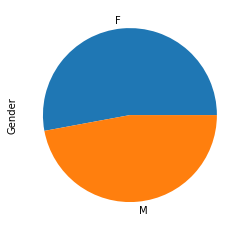

In [67]:
gender_count = df["Gender"].value_counts()

print(gender_count)
gender_count.plot.pie();
# We don't see a majority of users in any category particular to Gender. So we can assume less dependency on this column

  Education_Level Education_Level
0             3.0     High School
1             2.0        Graduate
2             2.0        Graduate
3             3.0     High School
4             5.0      Uneducated
Total number of columns in new dataframe: 20


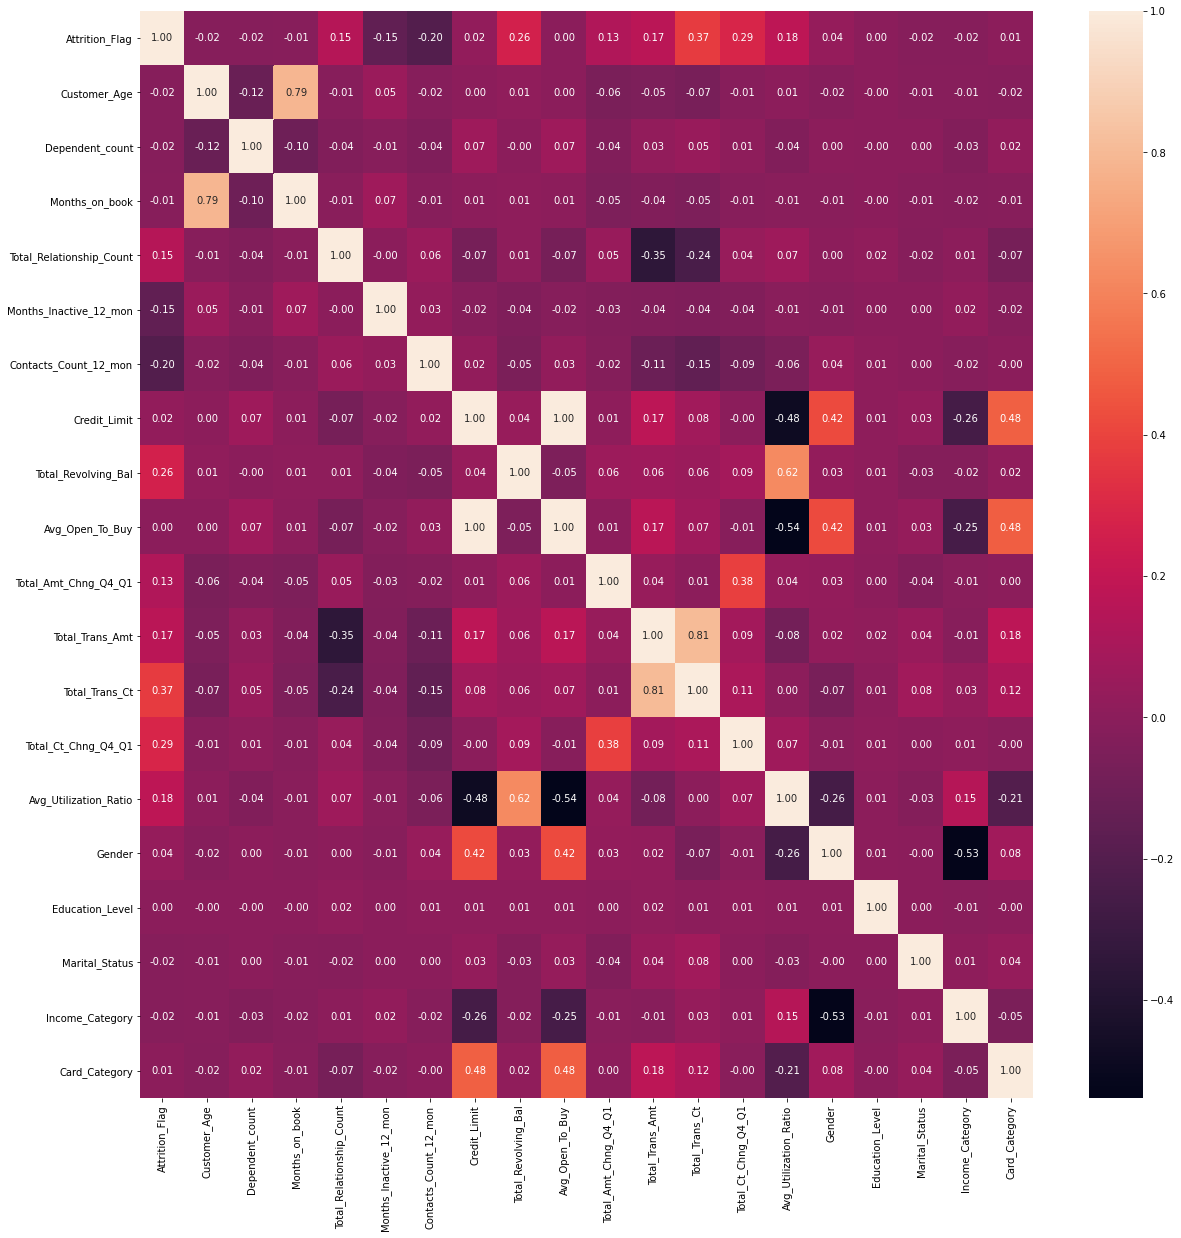

In [92]:
# Separate out categorical columns of the dataframe
cat_df = df.select_dtypes(include=['object']).copy()
# Separate out non-categorical columns of the dataframe
non_cat_df = df.drop(cat_df.columns.tolist(), axis=1)

ord_enc = OrdinalEncoder()
for col in cat_df.columns.tolist():
   non_cat_df[col] =  ord_enc.fit_transform(cat_df[[col]])

# Print out example of convertion
print(pd.concat([non_cat_df["Education_Level"], cat_df["Education_Level"]], axis=1).head())

print("Total number of columns in new dataframe: " + str(non_cat_df.shape[1]))

f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(non_cat_df.corr(), annot=True, fmt=".2f");

In [93]:
df = non_cat_df

In [94]:
# Q4: Predict Customers who will leave the bank

# let's try support vector machines
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"]

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.836788417242514

In [103]:
# let's try logistic regression
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42, max_iter=300).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8815399802566634

In [ ]:
# One positive thing observed is 0.79 correlation between customer_age to months on books. This means the bank is not losing out on old customers.

# Let's explore the positive correlation of 0.62 between avg_utilization_ratio to total_revolving_balance

# Definition:
# avg_utilization_ratio: Average Card Utilization Ratio
# total_revolving_balance

# We observe that there is a positive 0.26 correlation between the total_revolving_balance and attrition_flag

# People who have total_revolving_balance > mean of that column (1162.814061)
customer_revolving_bal = df[df["Total_Revolving_Bal"] > df["Total_Revolving_Bal"].mean()]
print("Customers who have more revolving balance: ", customer_revolving_bal.shape[0])
attr_cust_revolving_bal = attrited_customers[attrited_customers["Total_Revolving_Bal"] > df["Total_Revolving_Bal"].mean()]
print("Customers who have left and had more revolving balance: ", attr_cust_revolving_bal.shape[0])

Customers who have more revolving balance:  5605
Customers who have left and had more revolving balance:  428


Existing Customers with high revolving balance and high card utilization: 3019
Less than $40K    1480
$40K - $60K        650
$60K - $80K        315
Unknown            260
$80K - $120K       229
$120K +             85
Name: Income_Category, dtype: int64


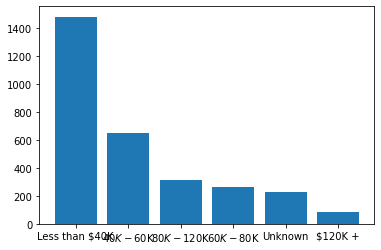

***************************************
Blue    3016
Gold       3
Name: Card_Category, dtype: int64


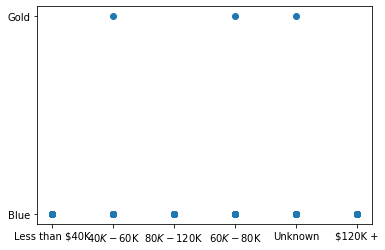

In [ ]:
# So people who had more revolving balance are still customers and they tend to use more credit card
exist_cust_high_revolving_bal_util_ratio = existing_customers[(existing_customers["Total_Revolving_Bal"] > df["Total_Revolving_Bal"].mean()) & (existing_customers["Avg_Utilization_Ratio"] > df["Avg_Utilization_Ratio"].mean())]
print("Existing Customers with high revolving balance and high card utilization:", exist_cust_high_revolving_bal_util_ratio.shape[0])

# why have these people stayed
print(exist_cust_high_revolving_bal_util_ratio["Income_Category"].value_counts())
plt.bar(exist_cust_high_revolving_bal_util_ratio["Income_Category"].unique(), exist_cust_high_revolving_bal_util_ratio["Income_Category"].value_counts());
plt.show()
print("***************************************")
print(exist_cust_high_revolving_bal_util_ratio["Card_Category"].value_counts())


In [ ]:
# We observe that there is a positive 0.18 correlation between the avg_utilization_ratio and attrition_flag

# People who use more credit card and are existing customers
customer_util_ratio = df[df["Avg_Utilization_Ratio"] > df["Avg_Utilization_Ratio"].mean()]
print("Customers who use more credit card: ", customer_revolving_bal.shape[0])
exist_cust_util_ratio = existing_customers[existing_customers["Avg_Utilization_Ratio"] > df["Avg_Utilization_Ratio"].mean()]
print("Still exisiting customers and use more credit card: ", exist_cust_util_ratio.shape[0])

# Here many customers who used credit card a lot have left
attr_high_util_ratio = df[(df["Avg_Utilization_Ratio"] > df["Avg_Utilization_Ratio"].mean()) & (df["Attrition_Flag"] == 0)]

attr_high_util_ratio.head()

Customers who use more credit card:  5605
Still exisiting customers and use more credit card:  3710


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
51,0,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
99,0,47,M,2,Unknown,Married,$80K - $120K,Blue,37,2,3,3,5449.0,1628,3821.0,0.696,836,18,0.385,0.299
198,0,68,M,0,High School,Married,Less than $40K,Blue,52,1,3,2,1438.3,900,538.3,0.743,760,21,0.615,0.626
230,0,60,F,1,Uneducated,Married,$40K - $60K,Blue,50,4,4,3,1438.3,1025,413.3,0.838,702,12,0.714,0.713
236,0,52,M,1,Uneducated,Married,$80K - $120K,Blue,36,2,3,3,1857.0,1833,24.0,0.723,829,17,0.700,0.987


Less than $40K    196
$40K - $60K        69
Unknown            41
$80K - $120K       34
$60K - $80K        19
$120K +            10
Name: Income_Category, dtype: int64


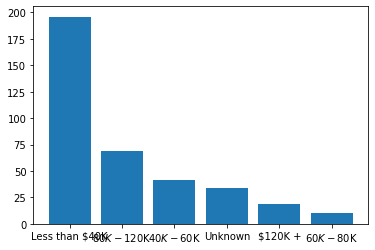

In [ ]:
print(attr_high_util_ratio["Income_Category"].value_counts())
plt.bar(attr_high_util_ratio["Income_Category"].unique(), attr_high_util_ratio["Income_Category"].value_counts());
plt.show()

# Conclusion: People who have income less than $40K and who used their credit cards more left the bank

Blue    369
Name: Card_Category, dtype: int64


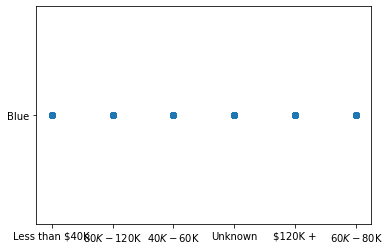

In [ ]:
print(attr_high_util_ratio["Card_Category"].value_counts())
plt.scatter(attr_high_util_ratio["Income_Category"], attr_high_util_ratio["Card_Category"]);
plt.show()

# All these customers used card_category: blue